In [8]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import math

from scipy import stats

from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
mydata = pd.read_csv('advertisement.csv')

In [10]:
mydata

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# You are given data which shows how different people click on advertizement or not depending on their age, sex, income, etc. Predict if a new person will click on ad or not.

In [11]:
list(mydata.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

In [12]:
Data=mydata.drop(['City','Country', 'Timestamp','Ad Topic Line'],axis=1)
Data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


# Check if data has null values

In [13]:
display(Data.isnull().any())

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Male                        False
Clicked on Ad               False
dtype: bool

In [14]:
X=Data.drop(['Clicked on Ad'],axis=1)
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [15]:
y=Data['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

# Explore data and how they relate to target class (here 0 and 1)

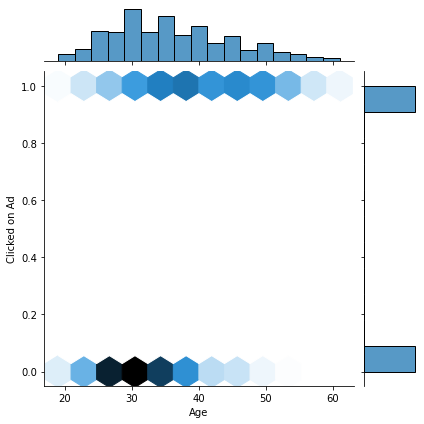

In [16]:
sns.jointplot(x='Age',y='Clicked on Ad',data=Data,kind='hex')


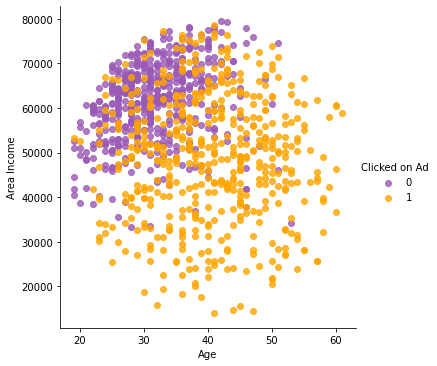

In [17]:
flatui = ["#9b59b6",  "orange"]
sns.set_palette(flatui)
sns.lmplot(x="Age",y="Area Income",hue="Clicked on Ad",data=Data,fit_reg=False)

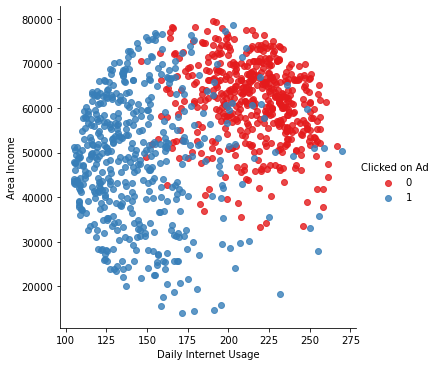

In [18]:
sns.lmplot(x="Daily Internet Usage",y="Area Income",hue="Clicked on Ad",data=Data,fit_reg=False,palette="Set1")

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

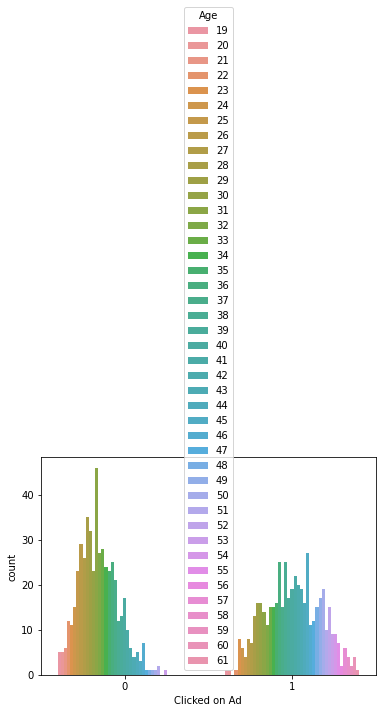

In [19]:
sns.countplot(x="Clicked on Ad",data=Data,hue='Age')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

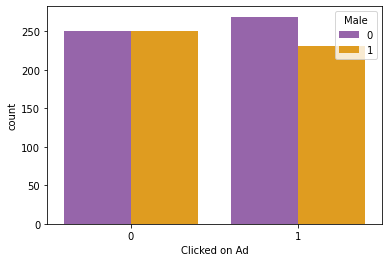

In [20]:
sns.countplot(x="Clicked on Ad",data=Data, hue='Male')

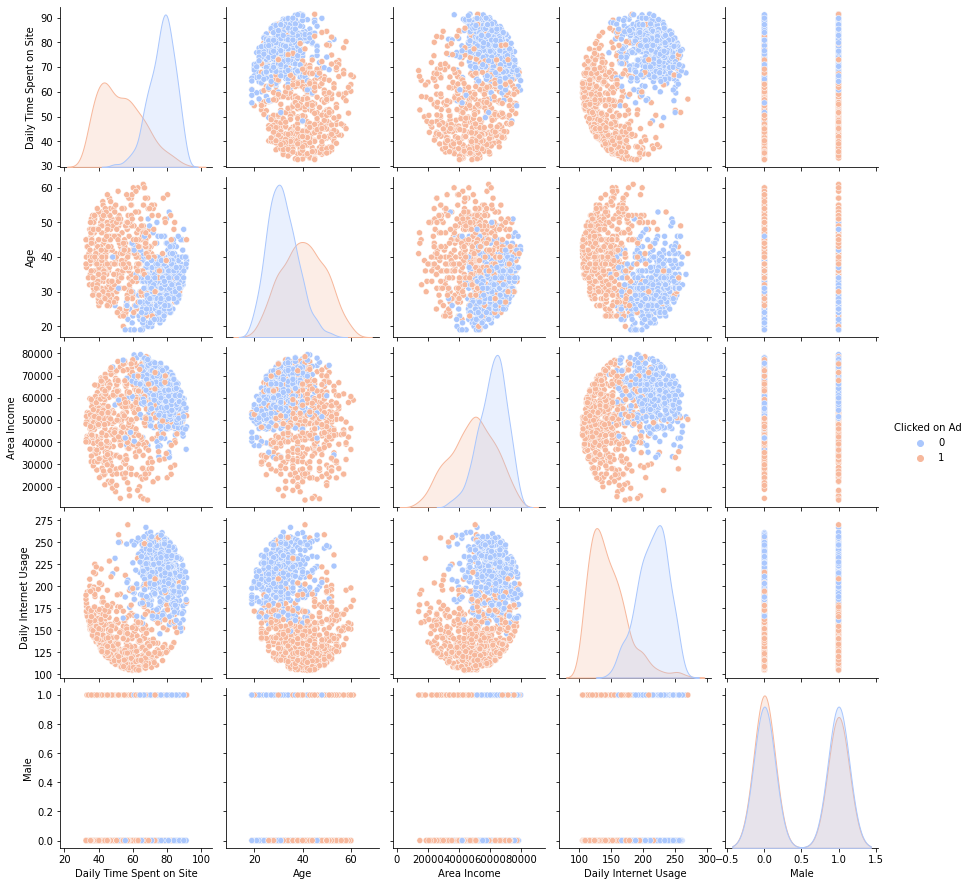

In [21]:
sns.pairplot(mydata, hue='Clicked on Ad', palette='coolwarm',plot_kws={'color': '#82ad32'})

In [22]:
# Check correlation between features

<AxesSubplot:>

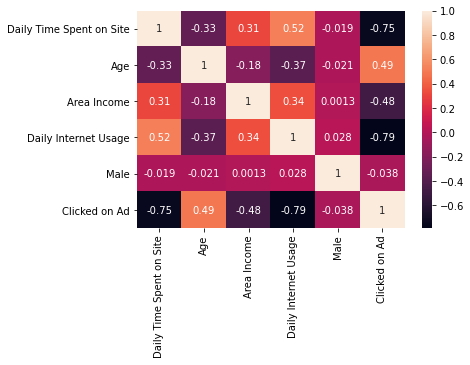

In [23]:
sns.heatmap(Data.corr(),annot=True)


# Train Logistic Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [25]:
regression_model= LogisticRegression()

In [26]:
regression_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
prediction=regression_model.predict(X_test)
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [28]:
print(regression_model.intercept_)

[0.00552637]


In [29]:
# Features coefficients

In [30]:
regression_model.coef_

array([[-5.55704954e-02,  2.61911546e-01, -1.53274922e-05,
        -2.70202278e-02,  1.79079055e-03]])

In [31]:
result=np.array([-5.55704954e-02,  2.61911546e-01, -1.53274922e-05,
        -2.70202278e-02,  1.79079055e-03])

In [32]:
cfd=pd.DataFrame(result,X.columns)
cfd

,0
Daily Time Spent on Site,-0.055570
Age,0.261912
Area Income,-0.000015
Daily Internet Usage,-0.027020
Male,0.001791


# Evaluation of the model


In [33]:
#calculate the mean squared erorr
model_mse= mean_squared_error(y_test, prediction)

#calculate the mean absolute erorr
model_mae= mean_absolute_error(y_test,prediction)

#calculate the mean squared erorr
model_rmse= math.sqrt(model_mse)

print('MSE {:.3}'.format(model_mse))
print('MAE {:.3}'.format(model_mae))
print('RMSE {:.3}'.format(model_rmse))

MSE 0.1
MAE 0.1
RMSE 0.316


In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
521,1,0
737,1,1
740,1,1
660,1,1
411,0,0
...,...,...
408,1,1
332,1,1
208,1,1
613,0,0


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

[[85  4]
 [16 95]]


# Vitualize some features with its preditions

In [36]:
prediction1=regression_model.predict(X)

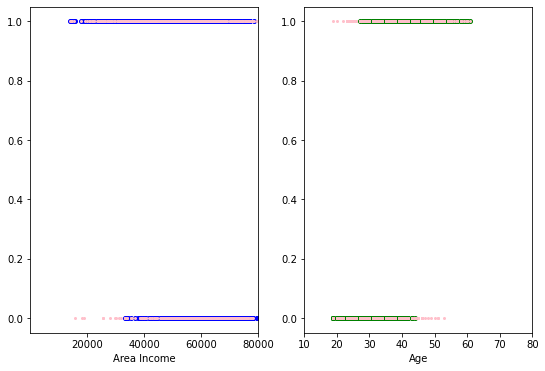

In [37]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,6))

ax0.plot(mydata["Area Income"], y,'1',
         color='blue',  lw=1, label="", marker=".", markersize=8)


ax0.plot(mydata["Area Income"], prediction1.reshape((1000,)),'p',
         color='pink',  lw=5, label="", marker=".", markersize=4)


ax1.plot(mydata["Age"], prediction1.reshape((1000,)),'p',
         color='green',  lw=1, label="", marker=".", markersize=8)

ax1.plot(mydata["Age"], y,'p',
         color='pink',  lw=1, label="", marker=".", markersize=4)

ax0.set_xlabel("Area Income")
ax1.set_xlabel("Age")


ax0.set_xlim([100, 80000])
ax1.set_xlim([10, 80])



plt.show()